### In-Depth: Manifold Learning

• We have seen how principal component analysis (PCA) can be used in the dimensionality reduction task—reducing the number of features of a dataset while maintaining the essential relationships between the points.

• While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data; we will see some examples of these below.

• To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces.

• When you think of a manifold, I'd suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in that two dimensions.

• In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in three-dimensional space.

• Rotating, re-orienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings.

• If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear.

• Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space.

• Here we will demonstrate a number of manifold methods, going most deeply into a couple techniques: multidimensional scaling (MDS), locally linear embedding (LLE), and isometric mapping (IsoMap).

• We begin with the standard imports:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

### Manifold Learning: "HELLO"

• To make these concepts more clear, let's start by generating some two-dimensional data that we can use to define a manifold.

• Here is a function that will create data in the shape of the word "HELLO":

In [18]:
def make_hello(N=1000, rseed=42):
    # Make plot with 'HELLO' text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG & draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

• Let's call the function and visualize the resulting data:

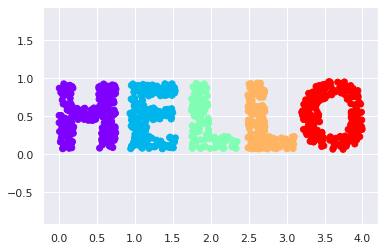

In [37]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

• The output is two dimensional, and consists of points drawn in the shape of the word, "HELLO".

• This data form will help us to see visually what these algorithms are doing.

### Multidimensional Scaling (MDS)

• Looking at data like this, we can see that the particular choice of x and y values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent.

• For example, if we use a rotation matrix to rotate the data, the x and y values change, but the data is still fundamentally the same:

• This tells us that the x and y values are not necessarily fundamental to the relationships in the data.

• What is fundamental, in this case, is the distance between each point and the other points in the dataset.

• A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$.

• Let's use Scikit-Learn's efficient pairwise_distances function to do this for our original data: